# Weather rport

In [202]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
weather_data = pd.read_csv('E:\\NCI\\Statistics for Data Analytics\\CA_2\\Data files for TABA-20231218\\weather_revised.csv')  # Replace 'weather.csv' with your actual file name


In [204]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         29889 non-null  object 
 1   maxtp(Maximum Air Temperature - degrees C)   29889 non-null  float64
 2   mintp(Minimum Air Temperature - degrees C)   29889 non-null  float64
 3   gmin(Grass Minimum Temperature - degrees C)  29889 non-null  object 
 4   rain(Precipitation Amount - mm)              29889 non-null  float64
 5   cbl (Mean CBL Pressure-hpa)                  29889 non-null  float64
 6   wdsp(Mean Wind Speed - knot)                 29889 non-null  float64
 7   pe(Potential Evapotranspiration - mm)        29889 non-null  float64
 8   evap(Evaporation -mm)                        29889 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.1+ MB


In [205]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtp(Maximum Air Temperature - degrees C),29889.0,13.064900,4.908828,-4.7,9.4,13.0,16.9,29.1
mintp(Minimum Air Temperature - degrees C),29889.0,6.157051,4.383088,-12.2,2.9,6.3,9.6,18.4
rain(Precipitation Amount - mm),29889.0,2.074720,4.396479,0.0,0.0,0.2,2.2,92.6
cbl (Mean CBL Pressure-hpa),29889.0,1003.520208,11.723154,949.6,996.2,1004.6,1011.7,1037.4
wdsp(Mean Wind Speed - knot),29889.0,10.198658,4.609213,0.0,6.8,9.6,13.0,35.5
pe(Potential Evapotranspiration - mm),29889.0,1.506986,1.001506,0.0,0.7,1.3,2.2,5.7


In [206]:
weather_data.head()

,date,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
0,01-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,02-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,03-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,04-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,05-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [207]:
weather_data.columns

Index(['date', 'maxtp(Maximum Air Temperature - degrees C)',
       'mintp(Minimum Air Temperature - degrees C)',
       'gmin(Grass Minimum Temperature - degrees C)',
       'rain(Precipitation Amount - mm)', 'cbl (Mean CBL Pressure-hpa)',
       'wdsp(Mean Wind Speed - knot)', 'pe(Potential Evapotranspiration - mm)',
       'evap(Evaporation -mm)'],
      dtype='object')

In [208]:
weather_data.rename(columns={'maxtp(Maximum Air Temperature - degrees C)': 'maxtp', 'mintp(Minimum Air Temperature - degrees C)': 'mintp','gmin(Grass Minimum Temperature - degrees C)':'gmin','rain(Precipitation Amount - mm)':'rain','cbl (Mean CBL Pressure-hpa)':'cbl','wdsp(Mean Wind Speed - knot)':'wdsp','pe(Potential Evapotranspiration - mm)':'pe','evap(Evaporation -mm)':'evap'}, inplace=True)

In [209]:
weather_data.columns

Index(['date', 'maxtp', 'mintp', 'gmin', 'rain', 'cbl', 'wdsp', 'pe', 'evap'], dtype='object')

In [210]:
from datetime import datetime

In [211]:
import pandas as pd

# Convert the 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%b-%y')

# Function to adjust the years
def adjust_years(dt):
    if dt.year > 2023:  # assuming a reasonable threshold for distinguishing between 1900s and 2000s
        return dt.replace(year=dt.year - 100)
    return dt

# Apply the function to adjust the years
weather_data['date'] = weather_data['date'].apply(adjust_years)

# Extract day, month, and year into separate columns
weather_data['Day'] = weather_data['date'].dt.day
weather_data['Month'] = weather_data['date'].dt.month
weather_data['Year'] = weather_data['date'].dt.year

# Display the DataFrame with new columns
print(weather_data)


            date  maxtp  mintp  gmin  rain     cbl  wdsp   pe evap  Day  \
0     1942-01-01    9.7    6.8   4.7   0.0  1020.3  17.2  1.1  1.4    1   
1     1942-01-02    9.9    7.9   6.7   0.1  1016.2  15.2  0.7  0.9    2   
2     1942-01-03   11.2    8.9   7.2   1.5  1006.8  14.0  0.5  0.6    3   
3     1942-01-04    9.2    2.7   3.4   3.5  1001.5  17.0  0.6  0.7    4   
4     1942-01-05    3.5   -0.8     0   0.6  1013.4  13.0  0.6  0.7    5   
...          ...    ...    ...   ...   ...     ...   ...  ...  ...  ...   
29884 2023-10-27   13.2    4.1    -1   2.9   974.2   5.8  0.5  0.8   27   
29885 2023-10-28   14.1    9.3   7.2   4.4   970.1   8.5  0.7    1   28   
29886 2023-10-29   12.4    2.5  -1.2  11.1   972.0   5.2  0.4  0.6   29   
29887 2023-10-30   12.7    1.7  -1.3   2.1   979.9   4.1  0.3  0.5   30   
29888 2023-10-31   12.3    4.4   0.8   4.2   983.2   6.8  0.4  0.5   31   

       Month  Year  
0          1  1942  
1          1  1942  
2          1  1942  
3          1  1

In [212]:
print(weather_data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    29889 non-null  datetime64[ns]
 1   maxtp   29889 non-null  float64       
 2   mintp   29889 non-null  float64       
 3   gmin    29889 non-null  object        
 4   rain    29889 non-null  float64       
 5   cbl     29889 non-null  float64       
 6   wdsp    29889 non-null  float64       
 7   pe      29889 non-null  float64       
 8   evap    29889 non-null  object        
 9   Day     29889 non-null  int32         
 10  Month   29889 non-null  int32         
 11  Year    29889 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(2)
memory usage: 2.4+ MB
None 



In [213]:
print(weather_data['evap'].unique())

['1.4' '0.9' '0.6' '0.7' '0.5' '0.2' '0.1' '0.3' '0' '0.4' '0.8' '1.2'
 '1.3' '1.1' '1' '2' '1.7' '1.9' '2.2' '1.8' '2.7' '2.1' '2.9' '3.2' '1.6'
 '4.2' '3.7' '3.8' '3.3' '3.9' '3.5' '2.6' '2.8' '2.4' '4.1' '5' '4.8'
 '5.8' '4.9' '4.6' '4.3' '4.4' '5.2' '7.4' '5.1' '3.6' '3.1' '2.5' '2.3'
 '6.2' '4' '5.5' '6.6' '6.3' '5.7' '5.3' '3' '6.7' '5.6' '3.4' '4.7' '4.5'
 '1.5' '5.9' '5.4' '6.1' '6' '6.4' '6.5' '6.9' '6.8' '7' '7.2' '8.1' '7.9'
 ' ']


In [214]:
print(weather_data['gmin'].unique())

['4.7' '6.7' '7.2' '3.4' '0' '-3.7' '-1' '0.2' '0.9' '-4.1' '-9.5' '-1.1'
 '-2' '-8' '-7.8' '2.2' '1.7' '1.2' '-4.3' '-1.7' '2.8' '3' '1.8' '0.6'
 '-1.2' '-0.8' '0.1' '0.3' '-6.3' '-2.7' '2.9' '6' '5.8' '3.2' '-1.5'
 '-2.4' '2.4' '2' '-5.7' '-0.7' '-4.9' '-8.9' '0.4' '-8.3' '1.3' '-3.3'
 '-4.6' '-10.7' '-0.6' '5' '5.9' '0.8' '1.6' '3.3' '3.7' '4.4' '3.1' '1.1'
 '-0.4' '-2.1' '2.5' '3.6' '3.9' '7.6' '2.7' '5.6' '5.7' '7.8' '9.1' '8.2'
 '6.4' '4' '6.1' '6.8' '3.8' '2.3' '5.1' '6.5' '4.6' '9.4' '7.4' '7.9'
 '4.2' '4.9' '5.5' '7.3' '11.8' '5.2' '9.7' '-0.9' '7.7' '10.8' '1.5'
 '7.5' '15' '12.4' '6.9' '11.3' '13.7' '13.4' '10.6' '8.7' '8.1' '8.6'
 '6.6' '12' '8.3' '12.2' '10.2' '14.2' '15.6' '13.2' '11.7' '7.1' '11.1'
 '10.1' '9.9' '4.8' '10.9' '12.3' '14' '10.5' '13.1' '8.4' '9' '12.8'
 '5.4' '9.3' '11.4' '13.3' '8.9' '13.9' '7' '12.1' '9.6' '11.6' '6.3'
 '6.2' '0.5' '-0.1' '8.8' '12.6' '-6.1' '-3.9' '4.3' '-1.3' '-2.8' '-6.8'
 '-0.2' '-2.3' '-0.3' '-4.2' '-1.6' '2.6' '1.4' '9.2' '4.1' '1.

In [215]:
# Replace empty strings with NaN in 'gmin' and 'evao' columns
weather_data['gmin'] = weather_data['gmin'].replace('', np.nan)
weather_data['gmin'] = weather_data['gmin'].replace(' ', np.nan)
weather_data['evap'] = weather_data['evap'].replace(' ', np.nan)

# Check for missing values again
missing_values = weather_data.isna().sum()
print(missing_values)

date     0
maxtp    0
mintp    0
gmin     5
rain     0
cbl      0
wdsp     0
pe       0
evap     2
Day      0
Month    0
Year     0
dtype: int64


In [216]:
print(weather_data.Year.unique(), '\n')

[1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 



In [217]:
print(weather_data.Month.unique(), '\n')

[ 1  2  3  4  5  6  7  8  9 10 11 12] 



In [218]:
weather_data.isna().sum()

date     0
maxtp    0
mintp    0
gmin     5
rain     0
cbl      0
wdsp     0
pe       0
evap     2
Day      0
Month    0
Year     0
dtype: int64

In [219]:
B = weather_data.loc[weather_data['mintp']==min(weather_data['mintp'])][['Day', 'Month', 'Year','mintp']].values[0]
print('The Lowest Minimum Air Temperature of {0} Celcius was recorded on  {1}-{2}-{3} '.
      format(B[-1], int(B[0]), int(B[1]), int(B[2],)))

The Lowest Minimum Air Temperature of -12.2 Celcius was recorded on  25-12-2010 


In [220]:
C = weather_data.loc[weather_data['maxtp']==max(weather_data['maxtp'])][['Day', 'Month', 'Year','maxtp']].values[0]
print('The Lowest Maximum Air Temperature of {0} Celcius was recorded on  {1}-{2}-{3} '.
      format(B[-1], int(C[0]), int(C[1]), int(C[2])))

The Lowest Maximum Air Temperature of -12.2 Celcius was recorded on  18-7-2022 


In [221]:
R = weather_data.loc[weather_data['rain']==max(weather_data['rain'])][['Day', 'Month', 'Year', 'rain']].values[0]
print('The Highest Rainfall of {0} mm was recorded on {1}-{2}-{3}'.
      format(R[-1],int(R[0]), int(R[1]), int(R[2])))

The Highest Rainfall of 92.6 mm was recorded on 11-6-1993


In [222]:
weather_data.dtypes

date     datetime64[ns]
maxtp           float64
mintp           float64
gmin             object
rain            float64
cbl             float64
wdsp            float64
pe              float64
evap             object
Day               int32
Month             int32
Year              int32
dtype: object

In [223]:
weather_data['gmin'] = weather_data['gmin'].astype(float)

In [224]:
weather_data['evap'] = weather_data['evap'].astype(float)

In [225]:
weather_data.dtypes

date     datetime64[ns]
maxtp           float64
mintp           float64
gmin            float64
rain            float64
cbl             float64
wdsp            float64
pe              float64
evap            float64
Day               int32
Month             int32
Year              int32
dtype: object

In [226]:
weather_data[['maxtp','mintp','gmin','rain','cbl','wdsp','pe','evap']].describe()

,maxtp,mintp,gmin,rain,cbl,wdsp,pe,evap
count,29889.000000,29889.000000,29884.000000,29889.000000,29889.000000,29889.000000,29889.000000,29887.000000
mean,13.064900,6.157051,4.315145,2.074720,1003.520208,10.198658,1.506986,2.161662
std,4.908828,4.383088,5.061045,4.396479,11.723154,4.609213,1.001506,1.463069
min,-4.700000,-12.200000,-15.000000,0.000000,949.600000,0.000000,0.000000,0.000000
25%,9.400000,2.900000,0.500000,0.000000,996.200000,6.800000,0.700000,0.900000
50%,13.000000,6.300000,4.500000,0.200000,1004.600000,9.600000,1.300000,1.900000
75%,16.900000,9.600000,8.100000,2.200000,1011.700000,13.000000,2.200000,3.200000
max,29.100000,18.400000,17.900000,92.600000,1037.400000,35.500000,5.700000,8.100000


Text(0.5, 0, 'Minimum Temperature (C)')

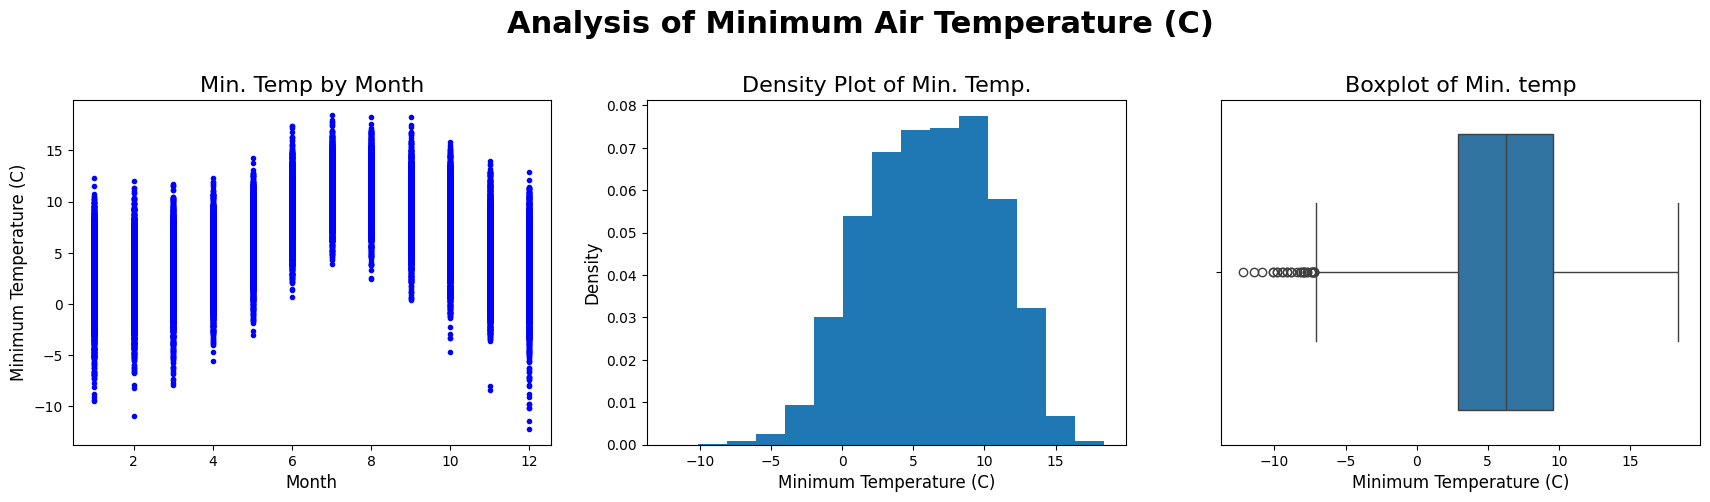

In [227]:
plt.figure(figsize=(21,5))
plt.suptitle("Analysis of Minimum Air Temperature (C)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)
plt.title("Min. Temp by Month", fontsize = 16)
plt.plot(weather_data.Month, weather_data.mintp, 'b.')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Minimum Temperature (C)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(weather_data.mintp, density = True, bins = 15)
plt.title("Density Plot of Min. Temp.", fontsize = 16)
plt.xlabel("Minimum Temperature (C)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = weather_data, x = 'mintp')
plt.title("Boxplot of Min. temp", fontsize = 16)
plt.xlabel("Minimum Temperature (C)", fontsize = 12)

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\mtp_analysis')  # Change the file extension for different formats


In [25]:
summary = weather_data['mintp'].describe()
print(summary)

count    29889.000000
mean         6.157051
std          4.383088
min        -12.200000
25%          2.900000
50%          6.300000
75%          9.600000
max         18.400000
Name: mintp, dtype: float64


Text(0.5, 0, 'Maximum Temperature (C)')

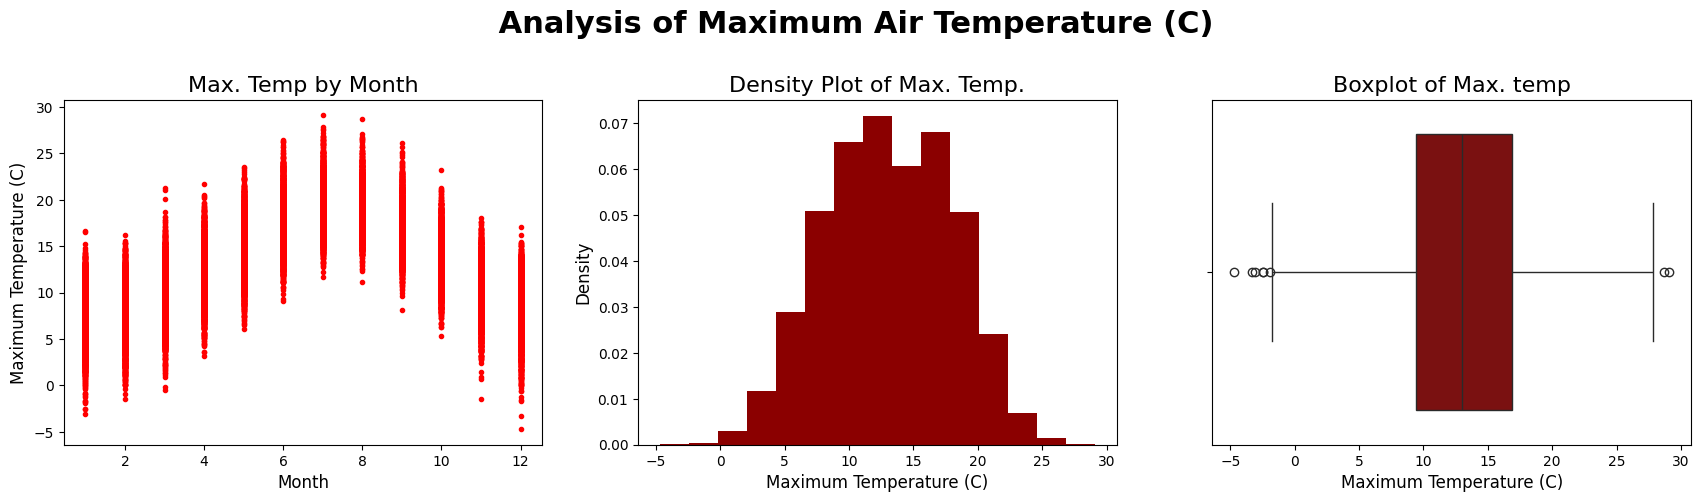

In [228]:
plt.figure(figsize=(21,5))
plt.suptitle(" Analysis of Maximum Air Temperature (C)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)
plt.title("Max. Temp by Month", fontsize = 16)
plt.plot(weather_data.Month, weather_data.maxtp, 'r.')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Maximum Temperature (C)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(weather_data.maxtp, density = True, bins = 15, color = "darkred")
plt.title("Density Plot of Max. Temp.", fontsize = 16)
plt.xlabel("Maximum Temperature (C)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = weather_data, x = 'maxtp', color = 'darkred')
plt.title("Boxplot of Max. temp", fontsize = 16)
plt.xlabel("Maximum Temperature (C)", fontsize = 12)

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\mxtp_analysis.png')  # Change the file extension for different formats



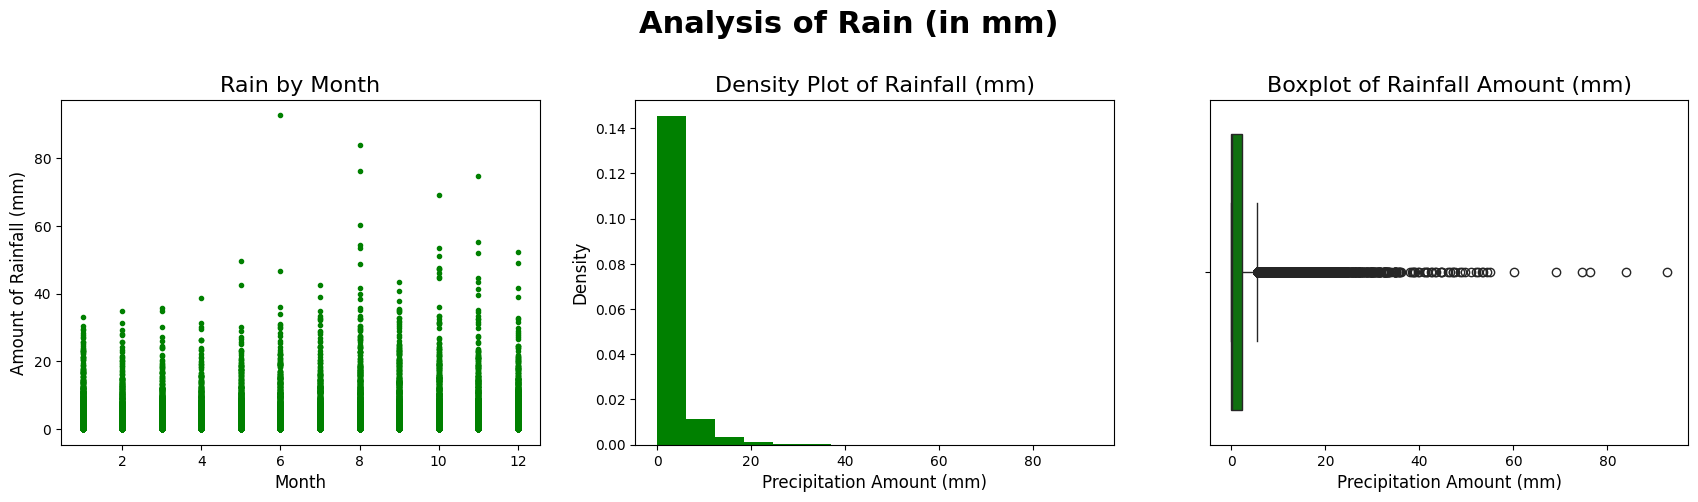

In [135]:
plt.figure(figsize=(21,5))
plt.suptitle("Analysis of Rain (in mm)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)
plt.title("Rain by Month", fontsize = 16)
plt.plot(weather_data.Month, weather_data.rain, 'g.')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Amount of Rainfall (mm)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(weather_data.rain, density = True, bins = 15, color = "green")
plt.title("Density Plot of Rainfall (mm)", fontsize = 16)
plt.xlabel("Precipitation Amount (mm)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = weather_data, x = 'rain', color = 'green')
plt.title("Boxplot of Rainfall Amount (mm)", fontsize = 16)
plt.xlabel("Precipitation Amount (mm)", fontsize = 12)

plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\rain_analysis.png')  # Change the file extension for different formats


Text(0.5, 0, 'Wind Speed')

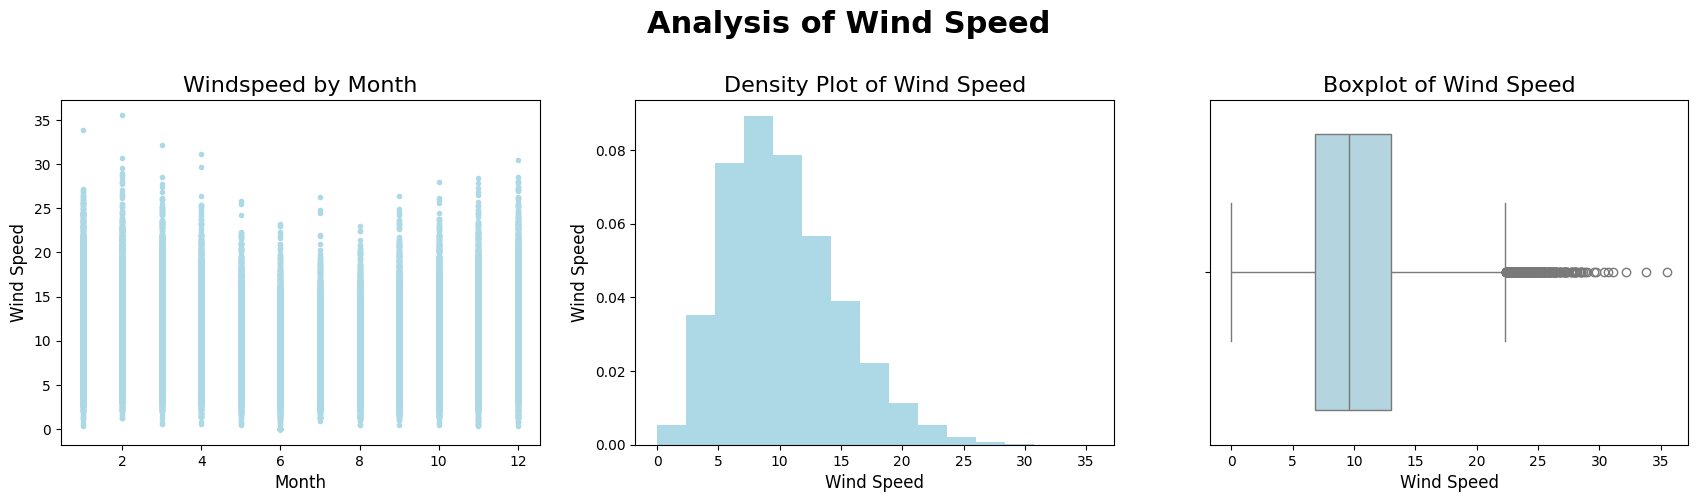

In [229]:
plt.figure(figsize=(21,5))
plt.suptitle("Analysis of Wind Speed", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)
plt.title("Windspeed by Month", fontsize = 16)
plt.plot(weather_data.Month, weather_data.wdsp, linestyle = 'None', color = 'lightblue', marker = '.')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Wind Speed", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(weather_data.wdsp, density = True, bins = 15, color = "lightblue")
plt.title("Density Plot of Wind Speed", fontsize = 16)
plt.xlabel("Wind Speed", fontsize = 12)
plt.ylabel("Wind Speed", fontsize = 12)


plt.subplot(1,3,3)
sns.boxplot(data = weather_data, x = 'wdsp', color = 'lightblue')
plt.title("Boxplot of Wind Speed", fontsize = 16)
plt.xlabel("Wind Speed", fontsize = 12)

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\wind_analysis')  # Change the file extension for different formats


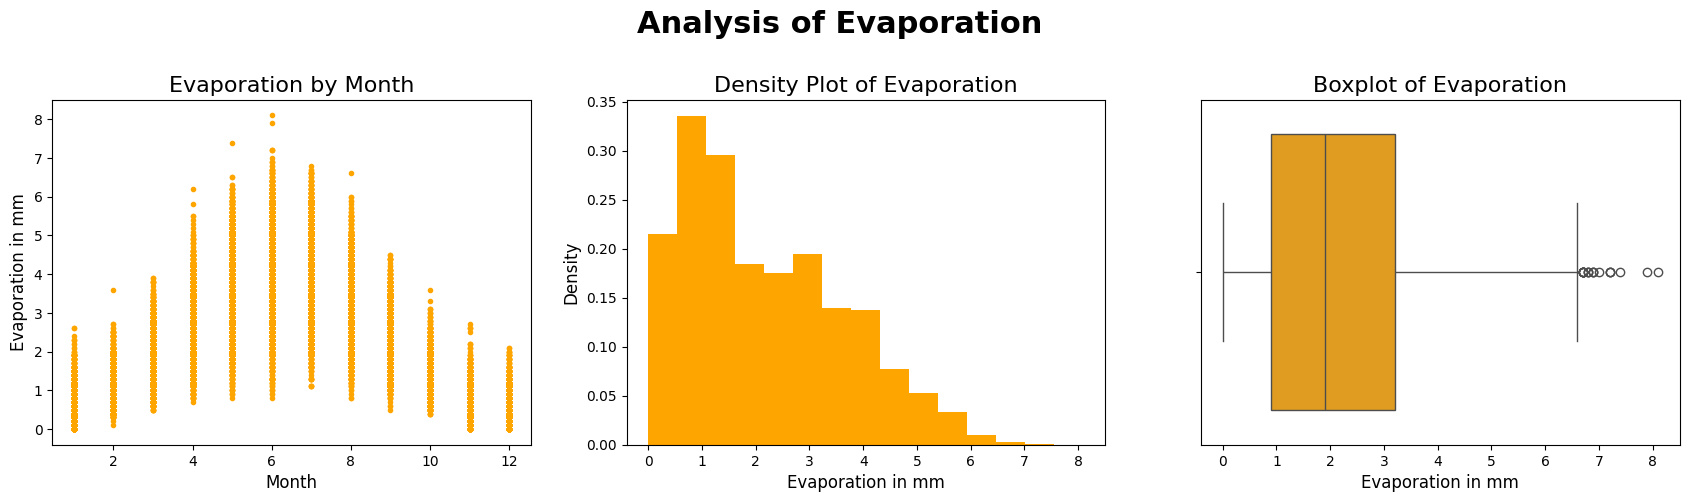

In [142]:
plt.figure(figsize=(21,5))
plt.suptitle("Analysis of Evaporation", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)
plt.title("Evaporation by Month", fontsize = 16)
plt.plot(weather_data.Month, weather_data.evap, marker = '.', color = 'orange', linestyle = 'None')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Evaporation in mm", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(weather_data.evap, density = True, bins = 15, color = "orange")
plt.title("Density Plot of Evaporation", fontsize = 16)
plt.xlabel("Evaporation in mm", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = weather_data, x = 'evap', color = 'orange')
plt.title("Boxplot of Evaporation", fontsize = 16)
plt.xlabel("Evaporation in mm", fontsize = 12)

plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\evp_analysis')  # Change the file extension for different formats


Text(0.5, 0, 'Gross min in C')

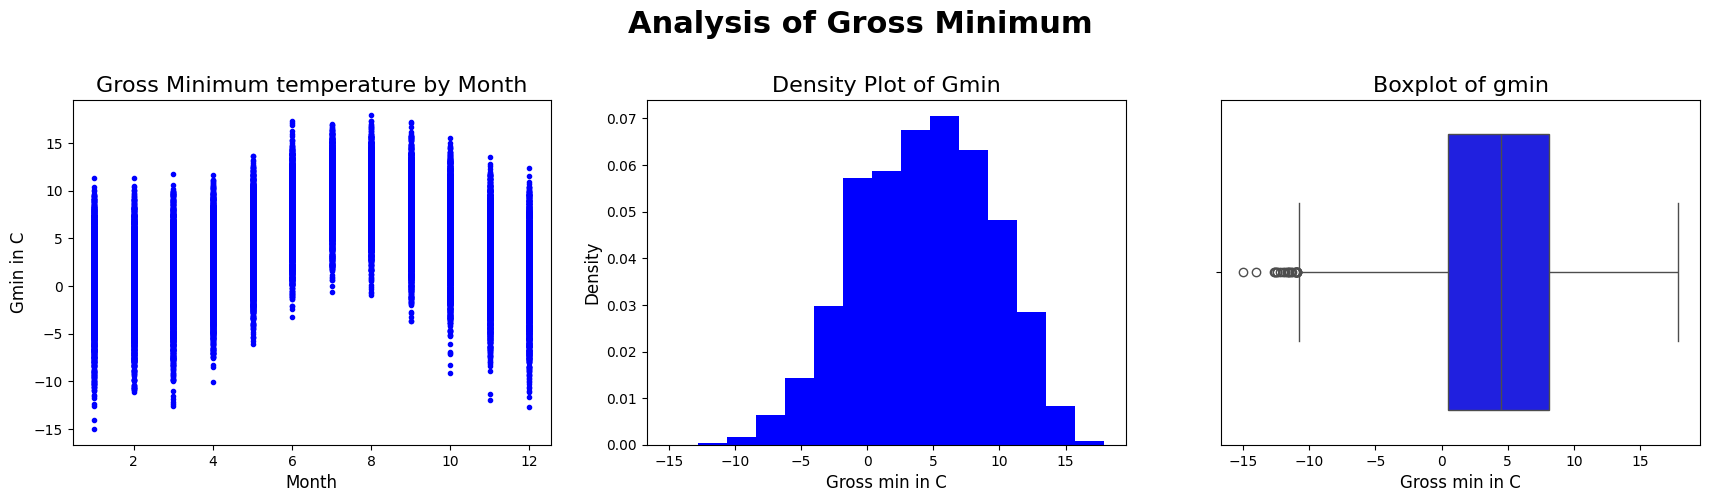

In [230]:
plt.figure(figsize=(21,5))
plt.suptitle("Analysis of Gross Minimum", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)
plt.title("Gross Minimum temperature by Month", fontsize = 16)
plt.plot(weather_data.Month, weather_data.gmin, marker = '.', color = 'blue', linestyle = 'None')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Gmin in C", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(weather_data.gmin, density = True, bins = 15, color = "blue")
plt.title("Density Plot of Gmin", fontsize = 16)
plt.xlabel("Gross min in C", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = weather_data, x = 'gmin', color = 'blue')
plt.title("Boxplot of gmin", fontsize = 16)
plt.xlabel("Gross min in C", fontsize = 12)

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\gmin_analysis')  # Change the file extension for different formats


Text(38.94463194444444, 0.5, 'Minimum Air Temperature (C): mintp')

<Figure size 640x480 with 0 Axes>

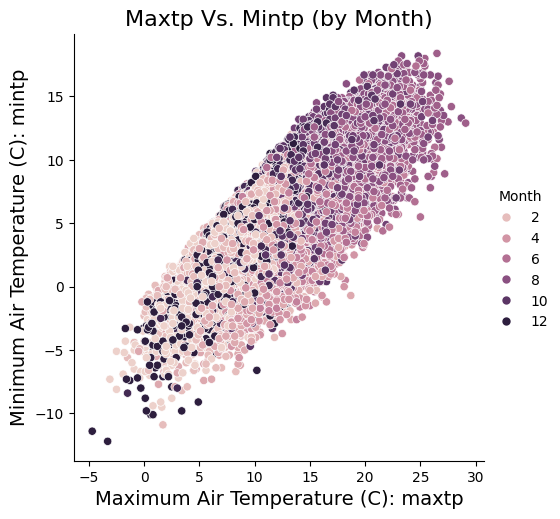

In [30]:
plt.figure()
sns.relplot(x = "maxtp", y = "mintp", data = weather_data, hue = "Month")
plt.title("Maxtp Vs. Mintp (by Month)", fontsize = 16)
plt.xlabel("Maximum Air Temperature (C): maxtp", fontsize = 14)
plt.ylabel("Minimum Air Temperature (C): mintp", fontsize = 14)

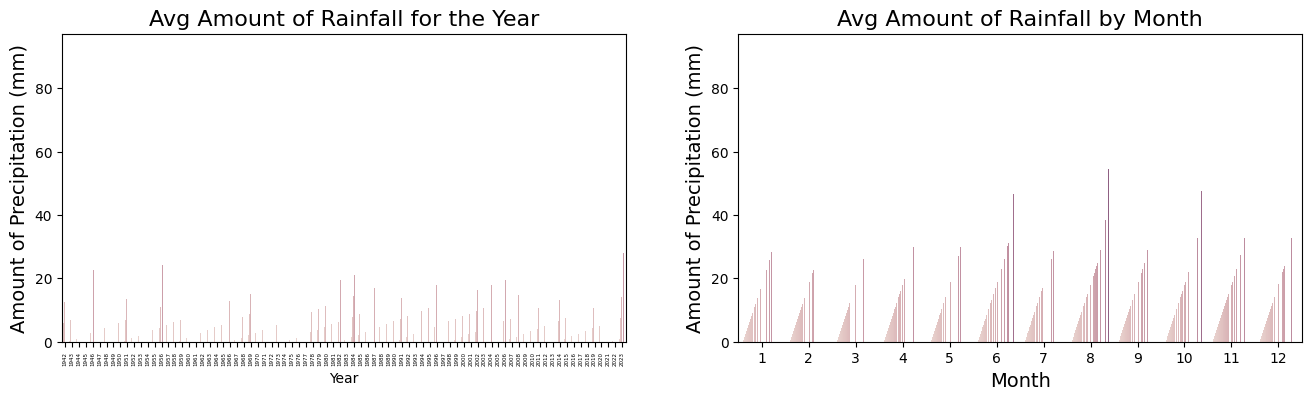

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=weather_data, y='rain', x='Year', hue='rain', errorbar=None)
plt.title("Avg Amount of Rainfall for the Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Amount of Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90,fontsize=4)
ax1.legend_.remove()

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=weather_data, y='rain', x='Month', hue='rain', errorbar=None)
plt.title("Avg Amount of Rainfall by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Amount of Precipitation (mm)", fontsize=14)
ax2.legend_.remove()

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\avg_rainfall.png')  # Change the file extension for different formats

plt.show()

## Seasonal Decomposition:Decompose the time series into its components (trend, seasonality, and residual) to understand its structure.

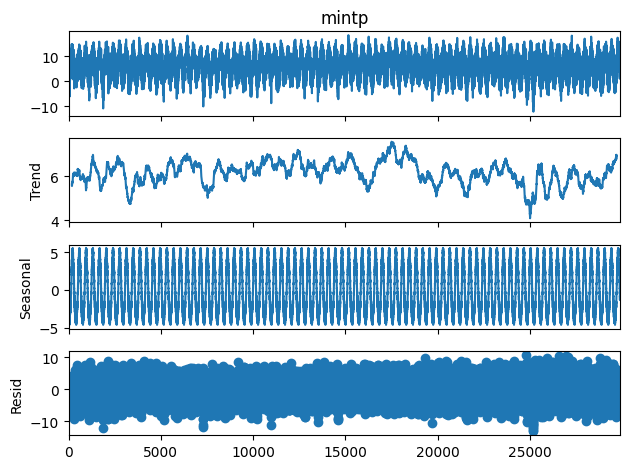

In [232]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weather_data['mintp'], model='additive', period=365)  # Assuming annual seasonality
result.plot()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\ssnl_dcmpst.png')  # Change the file extension for different formats

plt.show()

## Stationarity Check:Check for stationarity using methods like Augmented Dickey-Fuller test. If non-stationary, consider differencing.

In [233]:
from statsmodels.tsa.stattools import adfuller

result_adf = adfuller(weather_data['mintp'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])

p_value = result_adf[1]
formatted_p_value = format(p_value, '.20f')
print("formatted p-value:", formatted_p_value)


ADF Statistic: -12.983652321952396
p-value: 2.9084994740401857e-24
formatted p-value: 0.00000000000000000000


In [234]:
print(weather_data.columns)

Index(['date', 'maxtp', 'mintp', 'gmin', 'rain', 'cbl', 'wdsp', 'pe', 'evap',
       'Day', 'Month', 'Year'],
      dtype='object')


In [235]:
weather_data["date"].head()

0   1942-01-01
1   1942-01-02
2   1942-01-03
3   1942-01-04
4   1942-01-05
Name: date, dtype: datetime64[ns]

## Moving Averages (MA):Simple Moving Average (SMA): The average of a set of data points over a specified time period. Exponential Moving Average (EMA): Gives more weight to recent observations, assigning exponentially decreasing weights.

In [236]:
import pandas as pd
import numpy as np

weather_datan = weather_data.copy()

# Convert 'gmin' and 'evap' columns to numeric if they are not already
weather_datan['gmin'] = pd.to_numeric(weather_datan['gmin'], errors='coerce')
weather_datan['evap'] = pd.to_numeric(weather_datan['evap'], errors='coerce')

# Convert 'date' column to datetime if it's not already
weather_datan['date'] = pd.to_datetime(weather_datan['date'])

# Sort the DataFrame by the 'date' column
weather_datan = weather_datan.sort_values(by='date')

# Set 'date' column as the index
weather_datan.set_index('date', inplace=True)

# 1. Resample to daily frequency and take the mean for 'mintp'
daily_mintp = weather_datan['mintp'].resample('D').mean()

# 2. Resample to monthly frequency and take the mean for 'mintp'
monthly_mintp = weather_datan['mintp'].resample('M').mean()

# 6. Calculate the rolling mean with a window size of 7 for 'mintp'
rolling_mintp = weather_datan['mintp'].rolling(window=7).mean()

# 7. Calculate the rolling median with a window size of 7 for 'mintp'
rolling_median_mintp = weather_datan['mintp'].rolling(window=7).median()

# 8. Calculate the exponential moving average for 'mintp' with a span of 7
ema_mintp = weather_datan['mintp'].ewm(span=7, adjust=False).mean()

# Display or use the results as needed
print("Daily Mean 'mintp':")
print(daily_mintp.head())

print("\nMonthly Mean 'mintp':")
print(monthly_mintp.head())

print("\n7-Day Rolling Mean 'mintp':")
print(rolling_mintp.head(10))

print("\n7-Day Rolling Median 'mintp':")
print(rolling_median_mintp.head(10))

print("\nExponential Moving Average 'mintp' with Span 7:")
print(ema_mintp.head())


Daily Mean 'mintp':
date
1942-01-01    6.8
1942-01-02    7.9
1942-01-03    8.9
1942-01-04    2.7
1942-01-05   -0.8
Freq: D, Name: mintp, dtype: float64

Monthly Mean 'mintp':
date
1942-01-31    1.683871
1942-02-28   -0.014286
1942-03-31    3.196774
1942-04-30    4.946667
1942-05-31    6.300000
Freq: M, Name: mintp, dtype: float64

7-Day Rolling Mean 'mintp':
date
1942-01-01         NaN
1942-01-02         NaN
1942-01-03         NaN
1942-01-04         NaN
1942-01-05         NaN
1942-01-06         NaN
1942-01-07    3.814286
1942-01-08    3.042857
1942-01-09    2.014286
1942-01-10    0.342857
Name: mintp, dtype: float64

7-Day Rolling Median 'mintp':
date
1942-01-01    NaN
1942-01-02    NaN
1942-01-03    NaN
1942-01-04    NaN
1942-01-05    NaN
1942-01-06    NaN
1942-01-07    2.7
1942-01-08    1.4
1942-01-09    0.7
1942-01-10    0.7
Name: mintp, dtype: float64

Exponential Moving Average 'mintp' with Span 7:
date
1942-01-01    6.800000
1942-01-02    7.075000
1942-01-03    7.531250
1942-01-0

## Autoregressive (AR) Model:Autoregressive (AR): Predicts the next value based on linear combination of past values. AR(p) uses the past p values.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'weather_datan'
# If not, replace 'weather_datan' with the actual name of your DataFrame
weather_datan = weather_data.copy()

# Assuming 'date' is a datetime column
weather_datan['date'] = pd.to_datetime(weather_datan['date'])

# Check if 'date' is already present as a column
if 'date' in weather_datan.columns:
    # Reset the index if 'date' is already set as the index
    if 'date' in weather_datan.index.names:
        weather_datan = weather_datan.reset_index()
    # Sort the DataFrame based on the 'date' column
    weather_datan = weather_datan.sort_values(by='date')

# Set 'date' as the index if it's not already
if 'date' not in weather_datan.index.names:
    weather_datan.set_index('date', inplace=True)



In [238]:
# Split the data into training (2019 to 2022) and evaluation (2023)
train_data = weather_datan.loc['2019-01-01':'2022-12-31', 'mintp']
eval_data = weather_datan.loc['2023-01-01':'2023-10-31', 'mintp']

# Ensure that train_data and eval_data have the same length
#train_data = train_data[:len(eval_data)]

# Fit an Autoregressive (AR) model
order = 365  # Adjust the order as needed
ar_model = AutoReg(train_data, lags=order)
ar_result = ar_model.fit()

# Predict using the AR model for the evaluation period
ar_predictions = ar_result.predict(start='2023-01-01', end='2023-10-31', dynamic=False)


print(len(eval_data))
print(len(ar_predictions))

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


304
304


In [239]:
print("Data Frequency:", eval_data.index.freq)

Data Frequency: None


In [240]:
print(len(train_data))

1461


In [241]:
missing_values_2023 = weather_datan.loc['2023-01-01':'2023-12-31', 'mintp'].isnull().sum()
print("Number of missing values in 2023:", missing_values_2023)

Number of missing values in 2023: 0


In [242]:
print("Start Date:", eval_data.index.min())
print("End Date:", eval_data.index.max())

Start Date: 2023-01-01 00:00:00
End Date: 2023-10-31 00:00:00


In [243]:
duplicate_dates = eval_data[eval_data.index.duplicated(keep=False)]
print("Duplicate Dates:", duplicate_dates)


Duplicate Dates: Series([], Name: mintp, dtype: float64)


In [244]:
print("Start Date:", train_data.index.min())
print("End Date:", train_data.index.max())

Start Date: 2019-01-01 00:00:00
End Date: 2022-12-31 00:00:00


mse for AR model: 12.423605684234465
rmse for AR model: 3.524713560593891


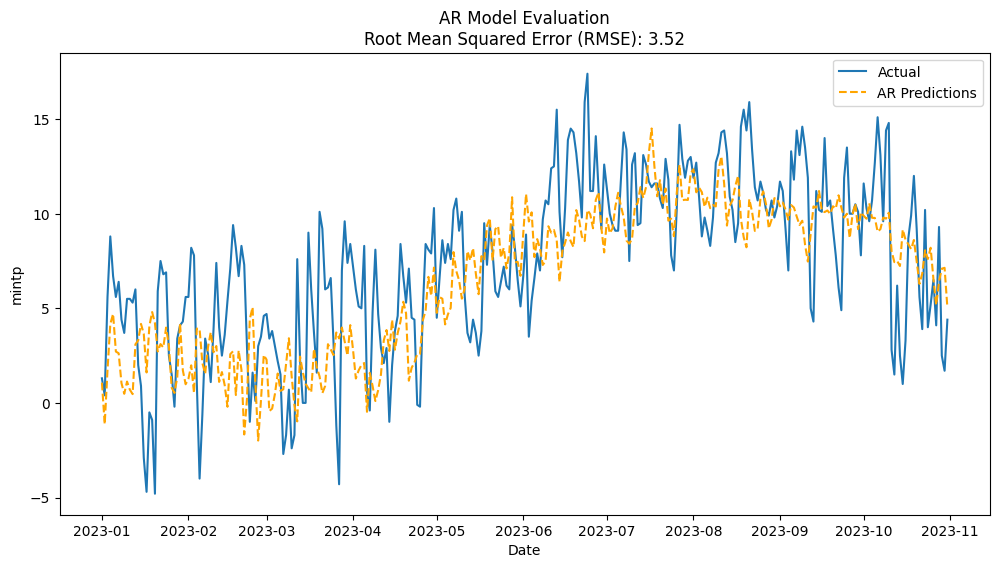

In [245]:
# Evaluate the performance of the AR model
mse = mean_squared_error(eval_data, ar_predictions)
rmse = np.sqrt(mse)
print(f'mse for AR model:',mse)
print(f'rmse for AR model:',rmse)
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(eval_data.index, eval_data, label='Actual')
plt.plot(ar_predictions.index, ar_predictions, label='AR Predictions', linestyle='--', color='orange')
plt.title(f'AR Model Evaluation\nRoot Mean Squared Error (RMSE): {rmse:.2f}')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\AR_model.png')  # Change the file extension for different formats
plt.show()

In [246]:
print("Train Data Index:", train_data.index)
print("Test Data Index:", eval_data.index)

Train Data Index: DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)
Test Data Index: DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='date', length=304, freq=None)


MSE Naive Forecasting: 24.50
MSE Seasonal Naive: 24.50
MSE Random Walk: 24.50
MSE Theta Model: 21.88


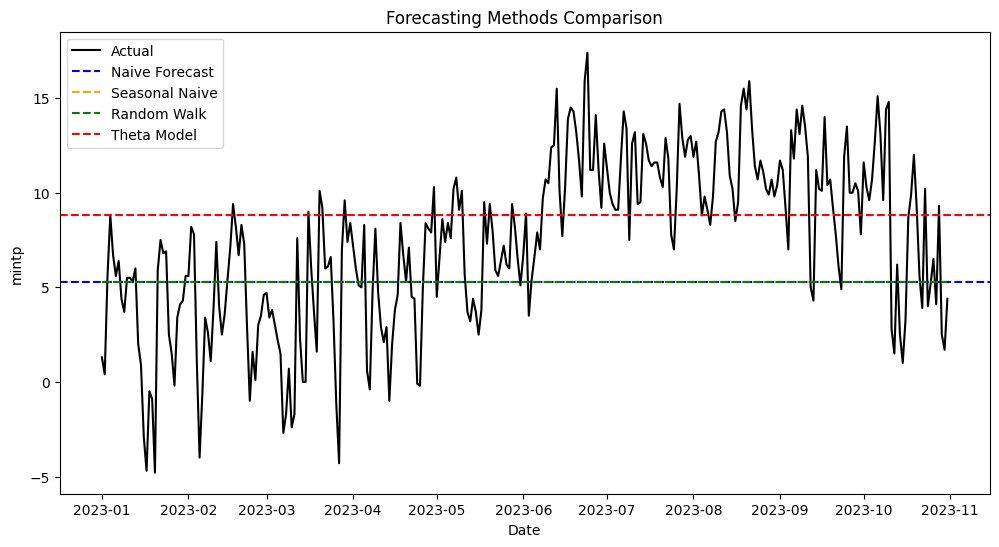

In [247]:

test_data = eval_data
# Naive Forecasting: Assumes that future values will be the same as the most recent observed value
naive_forecast = train_data.iloc[-1]  # Most recent observed value

# Seasonal Naive Forecast: Using the last value in the training data
seasonal_naive_forecast = pd.Series([train_data.iloc[-1]] * len(test_data), index=test_data.index)

# Random Walk Forecast: Using the last value in the training data
random_walk_forecast = pd.Series([train_data.iloc[-1]] * len(test_data), index=test_data.index)



# Theta Model: A simple exponential smoothing method that can be seen as a combination of random walk and drift
theta_model_forecast = train_data.iloc[-1] + (train_data.iloc[-1] - train_data.iloc[0])

# Evaluate the performance of the models
mse_naive = mean_squared_error(test_data, [naive_forecast] * len(test_data))
mse_seasonal_naive = mean_squared_error(test_data, seasonal_naive_forecast)
mse_random_walk = mean_squared_error(test_data, random_walk_forecast)
mse_theta_model = mean_squared_error(test_data, [theta_model_forecast] * len(test_data))

# Print the Mean Squared Errors
print(f'MSE Naive Forecasting: {mse_naive:.2f}')
print(f'MSE Seasonal Naive: {mse_seasonal_naive:.2f}')
print(f'MSE Random Walk: {mse_random_walk:.2f}')
print(f'MSE Theta Model: {mse_theta_model:.2f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='black')
plt.axhline(y=naive_forecast, linestyle='--', label='Naive Forecast', color='blue')
plt.plot(seasonal_naive_forecast.index, seasonal_naive_forecast, label='Seasonal Naive', linestyle='--', color='orange')
plt.plot(random_walk_forecast.index, random_walk_forecast, label='Random Walk', linestyle='--', color='green')
plt.axhline(y=theta_model_forecast, linestyle='--', label='Theta Model', color='red')
plt.title('Forecasting Methods Comparison')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
plt.show()

In [248]:
weather_data.head()

,date,maxtp,mintp,gmin,rain,cbl,wdsp,pe,evap,Day,Month,Year
0,1942-01-01,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4,1,1,1942
1,1942-01-02,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9,2,1,1942
2,1942-01-03,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6,3,1,1942
3,1942-01-04,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7,4,1,1942
4,1942-01-05,3.5,-0.8,0.0,0.6,1013.4,13.0,0.6,0.7,5,1,1942


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Length of Test Data: 304
Length of Naive Forecast: 304
Length of Mean Model Forecast: 304
Length of Seasonal Naive Forecast: 304
Length of SMA Forecast: 1432


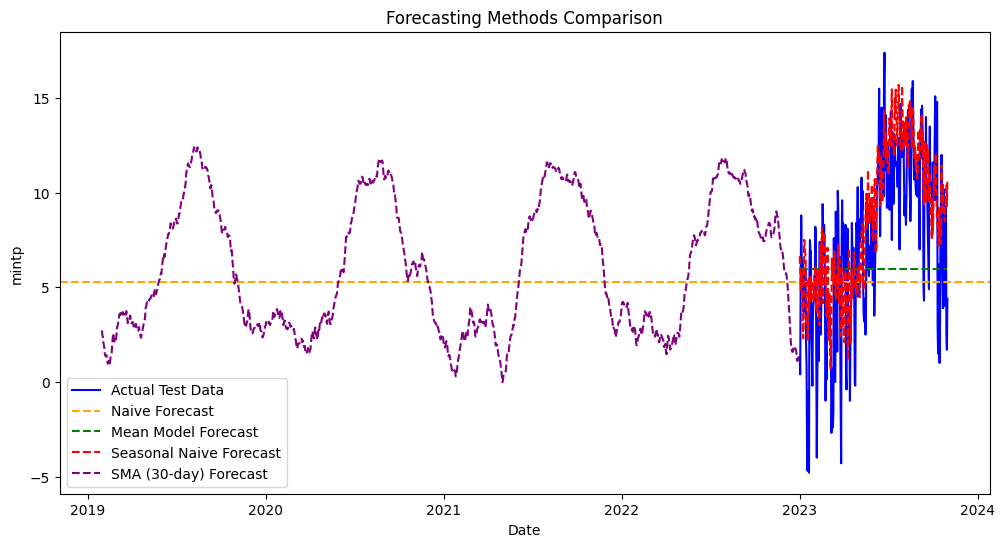

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming your DataFrame is named 'weather_data'
# If not, replace 'weather_data' with the actual name of your DataFrame
weather_datac = weather_data.copy()

# Assuming 'date' is a datetime column
weather_datac['date'] = pd.to_datetime(weather_datac['date'])

# Sort the DataFrame based on the 'date' column
weather_datac = weather_datac.sort_values(by='date')

# Set 'date' as the index
weather_datac.set_index('date', inplace=True)

# Split the data into training (2019 to 2022) and evaluation (2023)
train_data = weather_datac.loc['2019-01-01':'2022-12-31', 'mintp']
test_data = weather_datac.loc['2023-01-01':, 'mintp']

# Create time series objects for train and test
train_ts = pd.Series(train_data.values, index=train_data.index)
test_ts = pd.Series(test_data.values, index=test_data.index)

# Naive Forecasting: Assumes that future values will be the same as the most recent observed value
naive_forecast = train_ts.iloc[-1]

# Mean Model: Assumes that future values will be the mean of the training set
mean_train = np.mean(train_data)
fcast_mean = [mean_train] * len(test_data)

# Seasonal Naive: Assumes that the next value will be the same as the value observed in the previous season
seasonal_naive_model = ExponentialSmoothing(train_ts, seasonal='add', seasonal_periods=365)
seasonal_naive_fit = seasonal_naive_model.fit()
fcast_seasonal_naive = seasonal_naive_fit.forecast(len(test_ts))

# Simple Moving Average (SMA)
window_size = 30  # Choose an appropriate window size
sma_forecast = train_ts.rolling(window=window_size).mean().iloc[window_size - 1:]

# Print the lengths of the test data and forecasts
print("Length of Test Data:", len(test_data))
print("Length of Naive Forecast:", len([naive_forecast] * len(test_data)))
print("Length of Mean Model Forecast:", len(fcast_mean))
print("Length of Seasonal Naive Forecast:", len(fcast_seasonal_naive))
print("Length of SMA Forecast:", len(sma_forecast))

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_ts, label='Actual Test Data', color='blue')
plt.axhline(y=naive_forecast, linestyle='--', label='Naive Forecast', color='orange')
plt.plot(test_ts.index, fcast_mean, label='Mean Model Forecast', linestyle='--', color='green')
plt.plot(test_ts.index, fcast_seasonal_naive, label='Seasonal Naive Forecast', linestyle='--', color='red')
plt.plot(sma_forecast.index, sma_forecast, label=f'SMA ({window_size}-day) Forecast', linestyle='--', color='purple')
plt.title('Forecasting Methods Comparison')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\frcst_mthd.png')  # Change the file extension for different formats
plt.show()

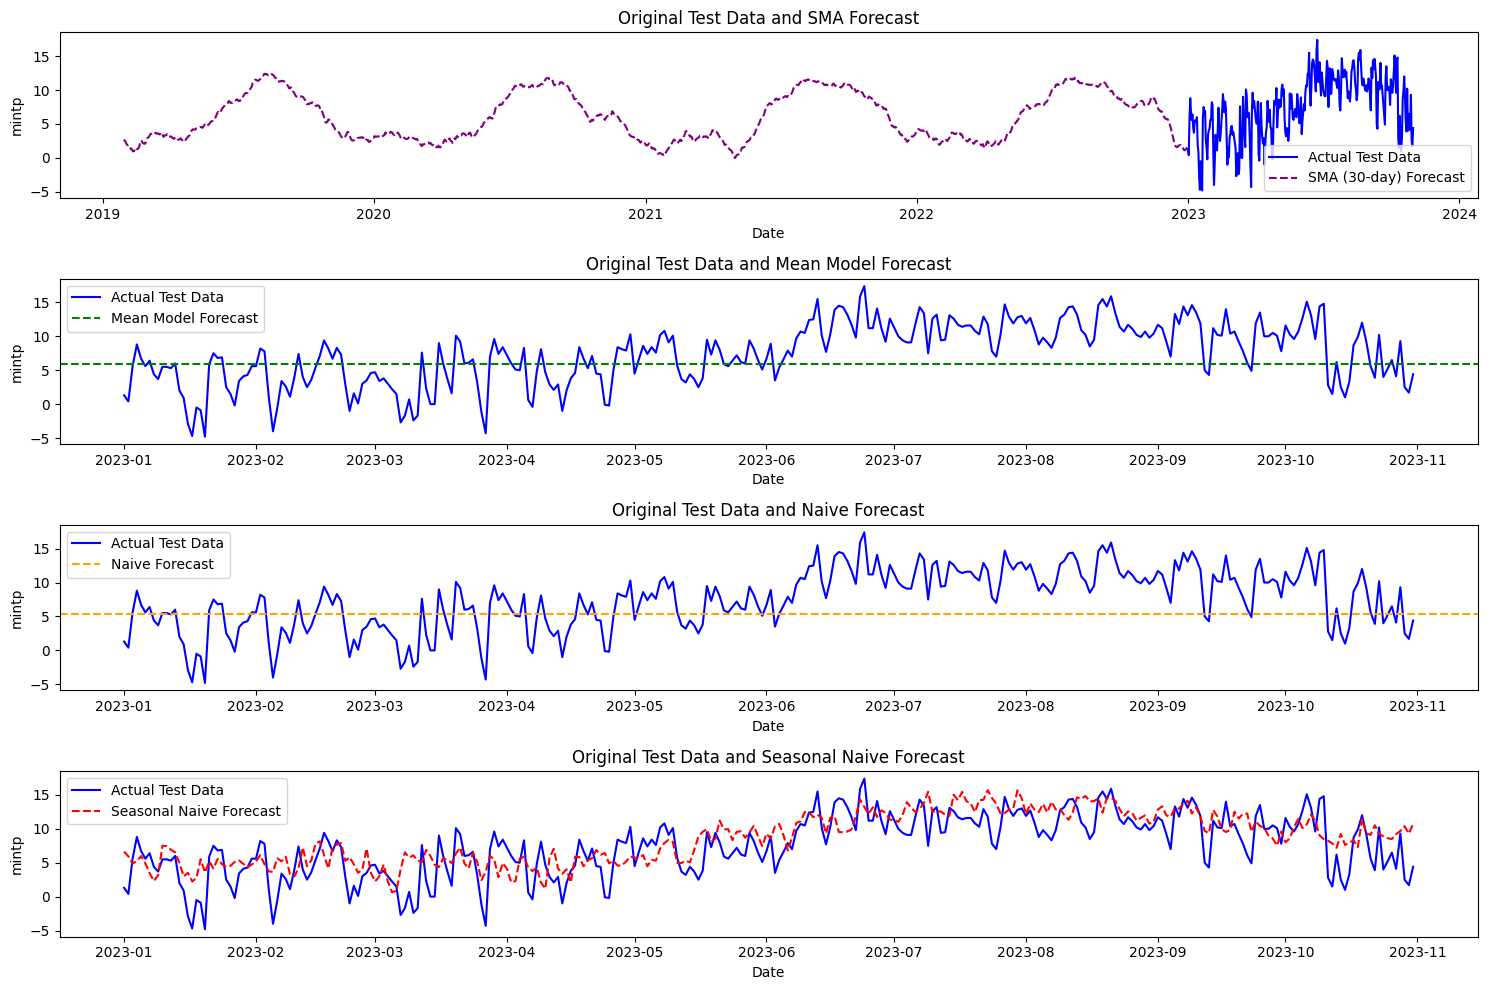

In [250]:
# Plotting the forecasts separately
plt.figure(figsize=(15, 10))

# Plot Original Test Data and SMA Forecast
plt.subplot(4, 1, 1)
plt.plot(test_ts, label='Actual Test Data', color='blue')
plt.plot(sma_forecast.index, sma_forecast, label=f'SMA ({window_size}-day) Forecast', linestyle='--', color='purple')
plt.title('Original Test Data and SMA Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()

# Plot Original Test Data and Mean Model Forecast
plt.subplot(4, 1, 2)
plt.plot(test_ts, label='Actual Test Data', color='blue')
plt.axhline(y=mean_train, linestyle='--', label='Mean Model Forecast', color='green')
plt.title('Original Test Data and Mean Model Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()

# Plot Original Test Data and Naive Forecast
plt.subplot(4, 1, 3)
plt.plot(test_ts, label='Actual Test Data', color='blue')
plt.axhline(y=naive_forecast, linestyle='--', label='Naive Forecast', color='orange')
plt.title('Original Test Data and Naive Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()

# Plot Original Test Data and Seasonal Naive Forecast
plt.subplot(4, 1, 4)
plt.plot(test_ts, label='Actual Test Data', color='blue')
plt.plot(test_ts.index, fcast_seasonal_naive, label='Seasonal Naive Forecast', linestyle='--', color='red')
plt.title('Original Test Data and Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\simple models.png')  # Change the file extension for different formats
plt.tight_layout()
plt.show()

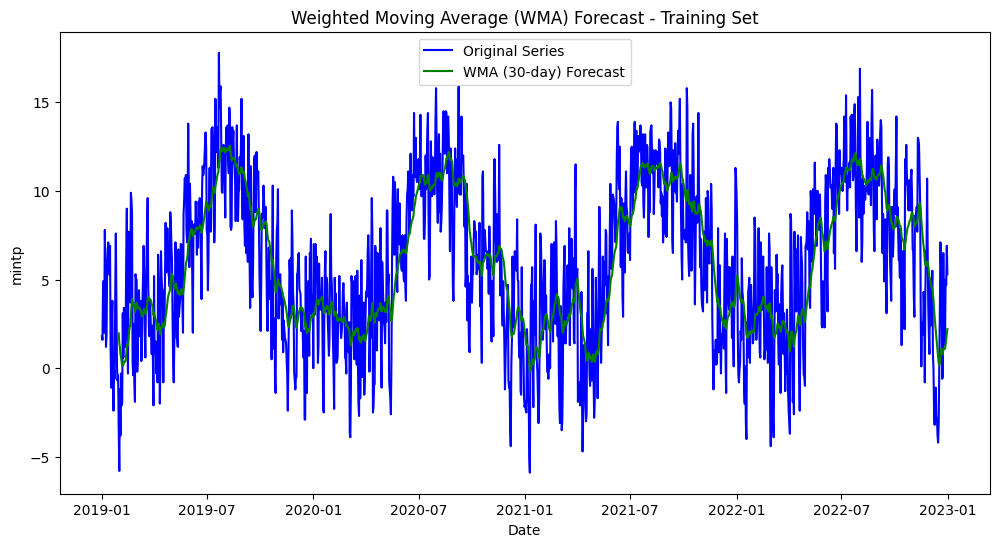

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


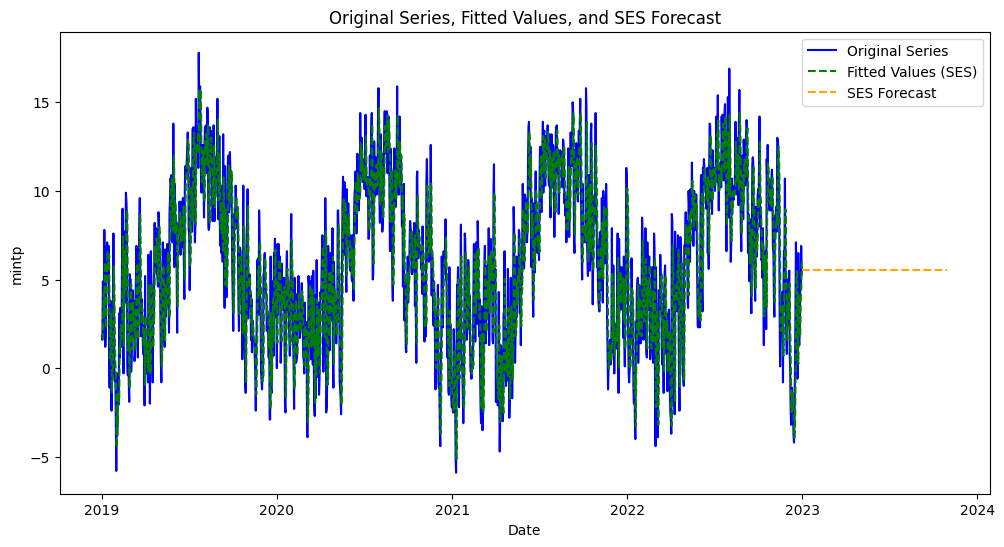

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Model 9: Weighted Moving Average (WMA)
window_size = 30  # Choose an appropriate window size
weights = np.arange(1, window_size + 1)  # You can adjust weights based on your preference
wma_forecast = train_ts.rolling(window=window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True).iloc[window_size - 1:]

# Plot the original time series and WMA forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Original Series', color='blue')
plt.plot(wma_forecast, label=f'WMA ({window_size}-day) Forecast', color='green')
plt.title('Weighted Moving Average (WMA) Forecast - Training Set')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\wma.png')  # Change the file extension for different formats
plt.show()

# Model 10: Simple Exponential Smoothing (SES)
# Fit the Simple Exponential Smoothing model on the training data
model_fit_ses = SimpleExpSmoothing(train_ts).fit()

# Get the fitted values on the training set
fitted_values_ses_train = model_fit_ses.fittedvalues

# Forecast on the test set
fcast_ses_test = model_fit_ses.forecast(len(test_ts))

# Plot the original time series, fitted values, and SES forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Original Series', color='blue')
plt.plot(fitted_values_ses_train, label='Fitted Values (SES)', color='green', linestyle='--')
plt.plot(test_ts.index, fcast_ses_test, label='SES Forecast', color='orange', linestyle='--')
plt.title('Original Series, Fitted Values, and SES Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\ses.png')  # Change the file extension for different formats
plt.show()


In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import acf

# Calculate accuracy metrics for training set
mae_train_ses = mean_absolute_error(train_ts, fitted_values_ses_train)
rmse_train_ses = mean_squared_error(train_ts, fitted_values_ses_train, squared=False)
mape_train_ses = mean_absolute_percentage_error(train_ts, fitted_values_ses_train)

# Calculate accuracy metrics for test set
mae_test_ses = mean_absolute_error(test_ts, fcast_ses_test)
rmse_test_ses = mean_squared_error(test_ts, fcast_ses_test, squared=False)
mape_test_ses = mean_absolute_percentage_error(test_ts, fcast_ses_test)

# Calculate Mean Error (ME) for test set
me_test_ses = test_ts.mean() - fcast_ses_test.mean()

# Calculate Mean Percentage Error (MPE) for test set
mpe_test_ses = (me_test_ses / test_ts.mean()) * 100

# Calculate Mean Absolute Scaled Error (MASE) for test set
acf1_test_ses = acf(test_ts - fcast_ses_test, fft=False, nlags=1)[1]
mase_test_ses = mae_test_ses / acf1_test_ses

# Print accuracy metrics for training set
print("\nSimple Exponential Smoothing Training Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train_ses:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_ses:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train_ses:.6f}")

# Print accuracy metrics for test set
print("\nSimple Exponential Smoothing Test Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test_ses:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_ses:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test_ses:.6f}")
print(f"Mean Error (ME): {me_test_ses:.6f}")
print(f"Mean Percentage Error (MPE): {mpe_test_ses:.6f}")
print(f"Mean Absolute Scaled Error (MASE): {mase_test_ses:.6f}")
# Calculate Mean Squared Error (MSE) for test set
mse_test_ses = mean_squared_error(test_ts, fcast_ses_test)

# Print Mean Squared Error (MSE) for test set
print(f"Mean Squared Error (MSE): {mse_test_ses:.6f}")


Simple Exponential Smoothing Training Set Metrics:
Mean Absolute Error (MAE): 2.233483
Root Mean Squared Error (RMSE): 2.827467
Mean Absolute Percentage Error (MAPE): 49454858066640.320312

Simple Exponential Smoothing Test Set Metrics:
Mean Absolute Error (MAE): 4.038975
Root Mean Squared Error (RMSE): 4.847084
Mean Absolute Percentage Error (MAPE): 164455662848075.562500
Mean Error (ME): 1.873177
Mean Percentage Error (MPE): 25.232449
Mean Absolute Scaled Error (MASE): 5.195155
Mean Squared Error (MSE): 23.494219


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


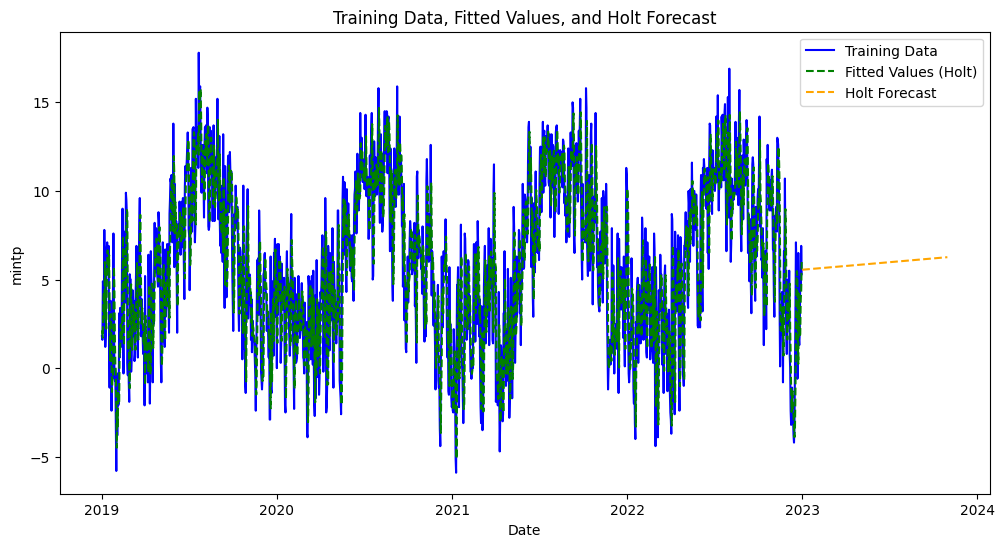


Holt Forecast Training Set Metrics:
Mean Absolute Error (MAE): 2.234036
Mean Squared Error (MSE): 7.994467
Root Mean Squared Error (RMSE): 2.827449

Holt Forecast Test Set Metrics:
Mean Absolute Error (MAE): 3.847080
Mean Squared Error (MSE): 21.286079
Root Mean Squared Error (RMSE): 4.613684


In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit the Double Exponential Smoothing model on the training data
model_fit_holt = ExponentialSmoothing(train_ts, trend='add', seasonal=None).fit()

# Get the fitted values on the training set
fitted_values_holt = model_fit_holt.fittedvalues

# Forecast on the test set
fcast_holt = model_fit_holt.forecast(len(test_ts))

# Plot the training data, Fitted Values, and Holt's Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Training Data', color='blue')
plt.plot(fitted_values_holt, label='Fitted Values (Holt)', color='green', linestyle='--')
plt.plot(test_ts.index, fcast_holt, label='Holt Forecast', color='orange', linestyle='--')
plt.title('Training Data, Fitted Values, and Holt Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\holt.png')  # Change the file extension for different formats
plt.show()

# Calculate accuracy metrics for training set
mae_train_holt = mean_absolute_error(train_ts, fitted_values_holt)
mse_train_holt = mean_squared_error(train_ts, fitted_values_holt)
rmse_train_holt = mean_squared_error(train_ts, fitted_values_holt, squared=False)

# Print metrics for training set
print("\nHolt Forecast Training Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train_holt:.6f}")
print(f"Mean Squared Error (MSE): {mse_train_holt:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_holt:.6f}")

# Calculate accuracy metrics for test set
mae_test_holt = mean_absolute_error(test_ts, fcast_holt)
mse_test_holt = mean_squared_error(test_ts, fcast_holt)
rmse_test_holt = mean_squared_error(test_ts, fcast_holt, squared=False)

# Print metrics for test set
print("\nHolt Forecast Test Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test_holt:.6f}")
print(f"Mean Squared Error (MSE): {mse_test_holt:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_holt:.6f}")


In [199]:
# Calculate accuracy metrics for test set
mae_test_holt = mean_absolute_error(test_ts, fcast_holt)
mape_test_holt = mean_absolute_percentage_error(test_ts, fcast_holt)
me_test_holt = np.mean(test_ts - fcast_holt)
mpe_test_holt = (me_test_holt / test_ts.mean()) * 100

# Calculate MASE
scaling_factor_holt = np.abs(test_ts.diff()).mean()
mase_test_holt = mae_test_holt / scaling_factor_holt

# Print metrics for test set
print("\nHolt Forecast Test Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test_holt:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test_holt:.6f}")
print(f"Mean Error (ME): {me_test_holt:.6f}")
print(f"Mean Percentage Error (MPE): {mpe_test_holt:.6f}")
print(f"Mean Absolute Scaled Error (MASE): {mase_test_holt:.6f}")



Holt Forecast Test Set Metrics:
Mean Absolute Error (MAE): 3.847080
Mean Absolute Percentage Error (MAPE): 169580485753347.312500
Mean Error (ME): 1.515616
Mean Percentage Error (MPE): 20.415950
Mean Absolute Scaled Error (MASE): 1.754727


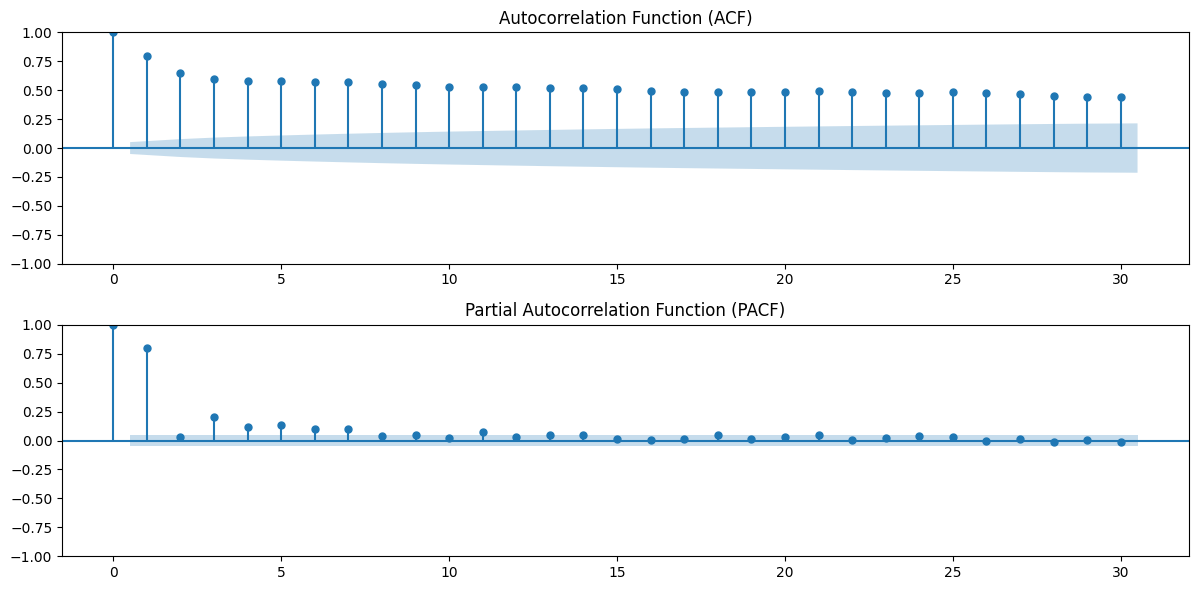

In [254]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for the original time series
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(train_ts, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(train_ts, lags=30, ax=plt.gca(), method='ywmle')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\acf_pcf.png')  # Change the file extension for different formats
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


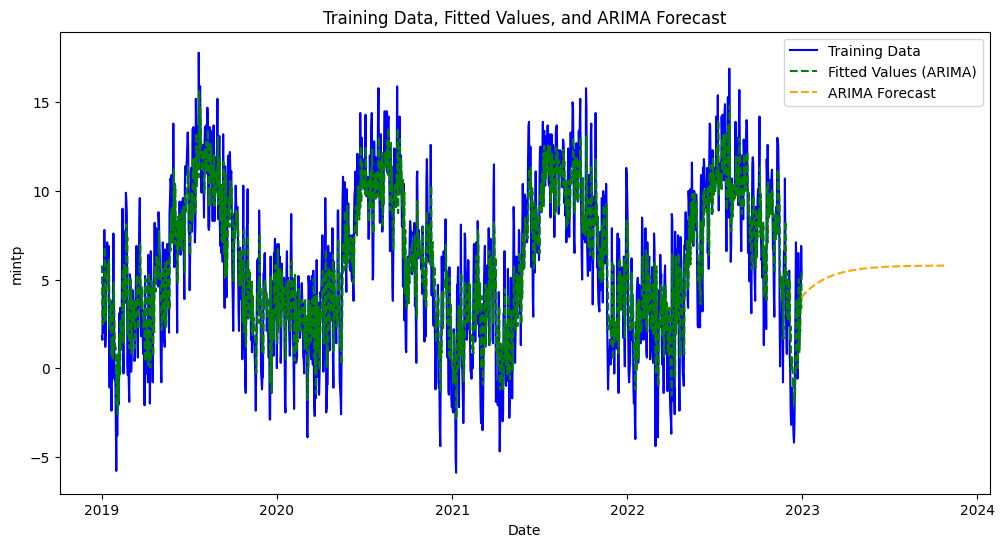


ARIMA Forecast Training Set Metrics:
Mean Squared Error (MSE): 6.798070
Root Mean Squared Error (RMSE): 2.607311

ARIMA Forecast Test Set Metrics:
Mean Squared Error (MSE): 21.928950
Root Mean Squared Error (RMSE): 4.682836


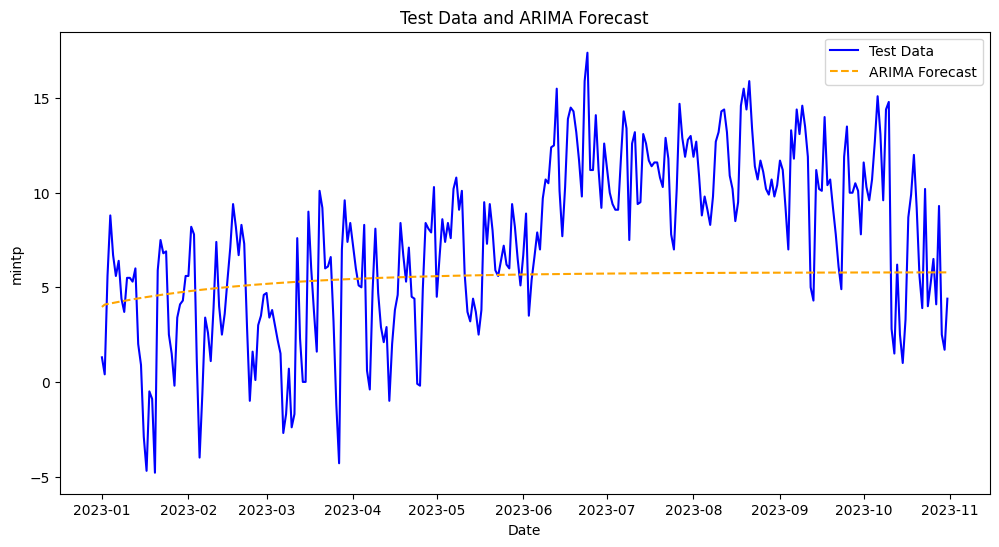

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Build ARIMA model
order = (1, 0, 2)  # Example order, you may need to tune this based on your data
arima_model = ARIMA(train_ts, order=order)
arima_fit = arima_model.fit()

# Get the fitted values on the training set
fitted_values_arima = arima_fit.fittedvalues

# Forecast on the test set
fcast_arima = arima_fit.predict(start=len(train_ts), end=len(train_ts) + len(test_ts) - 1, typ='levels')

# Plot the training data, Fitted Values, and ARIMA Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Training Data', color='blue')
plt.plot(fitted_values_arima, label='Fitted Values (ARIMA)', color='green', linestyle='--')
plt.plot(test_ts.index, fcast_arima, label='ARIMA Forecast', color='orange', linestyle='--')
plt.title('Training Data, Fitted Values, and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
plt.show()

# Calculate accuracy metrics for training set
mse_train_arima = mean_squared_error(train_ts, fitted_values_arima)
rmse_train_arima = sqrt(mse_train_arima)

# Print metrics for training set
print("\nARIMA Forecast Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train_arima:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_arima:.6f}")

# Calculate accuracy metrics for test set
mse_test_arima = mean_squared_error(test_ts, fcast_arima)
rmse_test_arima = sqrt(mse_test_arima)

# Print metrics for test set
print("\nARIMA Forecast Test Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test_arima:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_arima:.6f}")

# Plot the test set and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(test_ts, label='Test Data', color='blue')
plt.plot(test_ts.index, fcast_arima, label='ARIMA Forecast', color='orange', linestyle='--')
plt.title('Test Data and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('mintp')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\test_data_arimaf.png')  # Change the file extension for different formats
plt.show()


In [198]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calculate accuracy metrics for test set
mae_test_arima = mean_absolute_error(test_ts, fcast_arima)
mape_test_arima = mean_absolute_percentage_error(test_ts, fcast_arima)
me_test_arima = np.mean(test_ts - fcast_arima)
mpe_test_arima = (me_test_arima / test_ts.mean()) * 100

# Calculate MASE
scaling_factor = np.abs(test_ts.diff()).mean()
mase_test_arima = mae_test_arima / scaling_factor

# Print metrics for test set
print("\nARIMA Forecast Test Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test_arima:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test_arima:.6f}")
print(f"Mean Error (ME): {me_test_arima:.6f}")
print(f"Mean Percentage Error (MPE): {mpe_test_arima:.6f}")
print(f"Mean Absolute Scaled Error (MASE): {mase_test_arima:.6f}")



ARIMA Forecast Test Set Metrics:
Mean Absolute Error (MAE): 3.928666
Mean Absolute Percentage Error (MAPE): 157465580966526.875000
Mean Error (ME): 1.951308
Mean Percentage Error (MPE): 26.284900
Mean Absolute Scaled Error (MASE): 1.791940


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

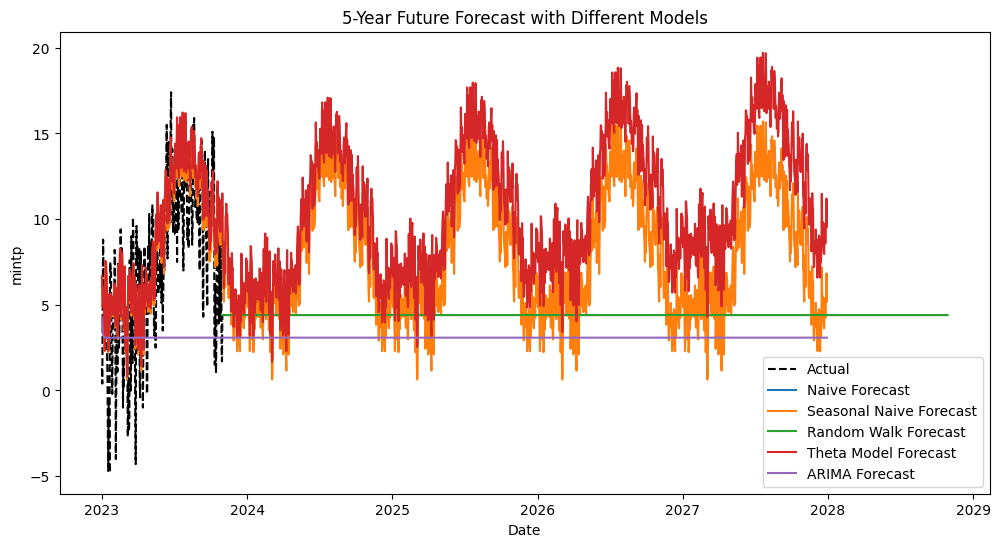

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have the necessary data: train_ts, test_ts

# Function to plot forecasts
def plot_forecasts(actual, forecasts, model_names, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual', color='black', linestyle='--')

    for i, forecast in enumerate(forecasts):
        plt.plot(forecast.index, forecast, label=f'{model_names[i]} Forecast')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('mintp')
    plt.legend()
    #plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\future_forecast.png')  # Change the file extension for different formats
    plt.show()

# Naive Forecast
naive_forecast = pd.Series(test_ts.iloc[-1], index=pd.date_range(start=test_ts.index[-1], periods=365 * 5, freq='D'))

# Seasonal Naive Forecast (Assuming daily data and a yearly seasonality)
seasonal_naive_model = ExponentialSmoothing(train_ts, seasonal='add', seasonal_periods=365)
seasonal_naive_fit = seasonal_naive_model.fit()
seasonal_naive_forecast = seasonal_naive_fit.forecast(365 * 5)

# Random Walk Forecast
random_walk_forecast = pd.Series(test_ts.iloc[-1], index=pd.date_range(start=test_ts.index[-1], periods=365 * 5, freq='D'))

# Theta Model Forecast
theta_model_fit = ExponentialSmoothing(train_ts, trend='add', seasonal='add', seasonal_periods=365).fit()
theta_model_forecast = theta_model_fit.forecast(365 * 5)

# ARIMA Forecast
arima_model = ARIMA(train_ts, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(365 * 5)

# Plot forecasts
plot_forecasts(test_ts, [naive_forecast, seasonal_naive_forecast, random_walk_forecast, theta_model_forecast, arima_forecast],
               ['Naive', 'Seasonal Naive', 'Random Walk', 'Theta Model', 'ARIMA'],
               '5-Year Future Forecast with Different Models')


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

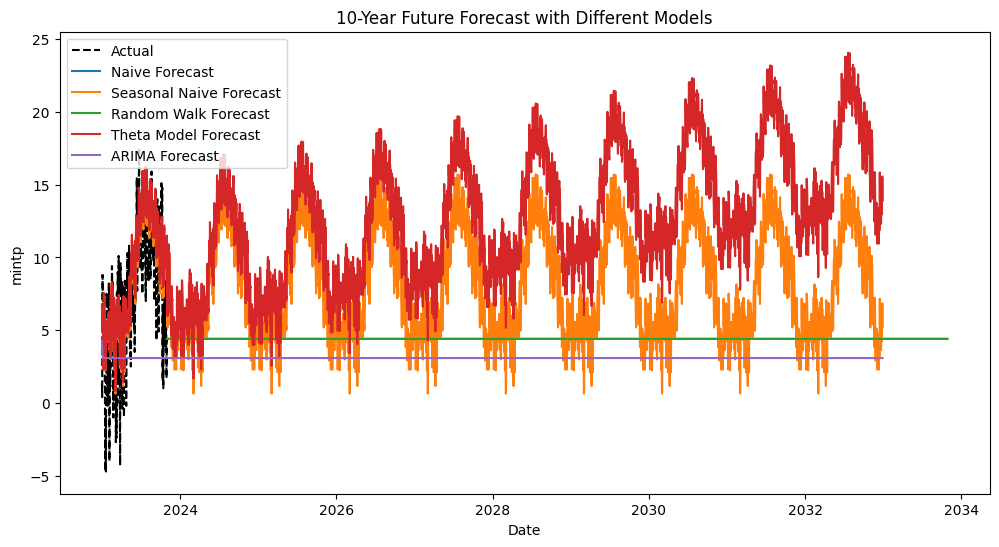

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have the necessary data: train_ts, test_ts

# Function to plot forecasts
def plot_forecasts(actual, forecasts, model_names, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual', color='black', linestyle='--')

    for i, forecast in enumerate(forecasts):
        plt.plot(forecast.index, forecast, label=f'{model_names[i]} Forecast')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('mintp')
    plt.legend()
    plt.show()

# Naive Forecast
naive_forecast = pd.Series(test_ts.iloc[-1], index=pd.date_range(start=test_ts.index[-1], periods=365 * 10, freq='D'))

# Seasonal Naive Forecast (Assuming daily data and a yearly seasonality)
seasonal_naive_model = ExponentialSmoothing(train_ts, seasonal='add', seasonal_periods=365)
seasonal_naive_fit = seasonal_naive_model.fit()
seasonal_naive_forecast = seasonal_naive_fit.forecast(365 * 10)

# Random Walk Forecast
random_walk_forecast = pd.Series(test_ts.iloc[-1], index=pd.date_range(start=test_ts.index[-1], periods=365 * 10, freq='D'))

# Theta Model Forecast
theta_model_fit = ExponentialSmoothing(train_ts, trend='add', seasonal='add', seasonal_periods=365).fit()
theta_model_forecast = theta_model_fit.forecast(365 * 10)

# ARIMA Forecast
arima_model = ARIMA(train_ts, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(365 * 10)

# Plot forecasts
plot_forecasts(test_ts, [naive_forecast, seasonal_naive_forecast, random_walk_forecast, theta_model_forecast, arima_forecast],
               ['Naive', 'Seasonal Naive', 'Random Walk', 'Theta Model', 'ARIMA'],
               '10-Year Future Forecast with Different Models')


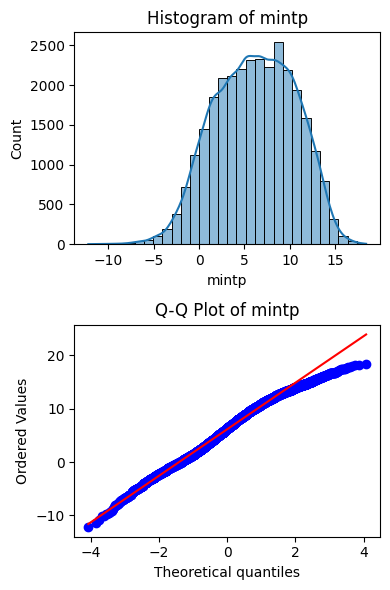

In [257]:
import seaborn as sns
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, figsize=(4, 6))

# Histogram
sns.histplot(weather_data['mintp'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Histogram of mintp')

# Q-Q plot
probplot(weather_data['mintp'], plot=axs[1])
axs[1].set_title('Q-Q Plot of mintp')

# Adjust layout
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\raw_data.png')  # Change the file extension for different formats
plt.show()


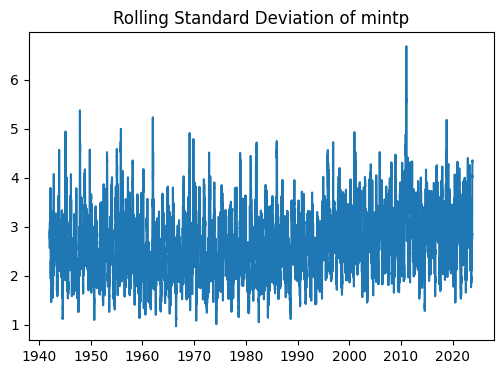

In [102]:
# Calculate rolling standard deviation
rolling_std = weather_data['mintp'].rolling(window=30).std()

# Plot rolling standard deviation
plt.figure(figsize=(6,4))
plt.plot(rolling_std)
plt.title('Rolling Standard Deviation of mintp')
plt.show()


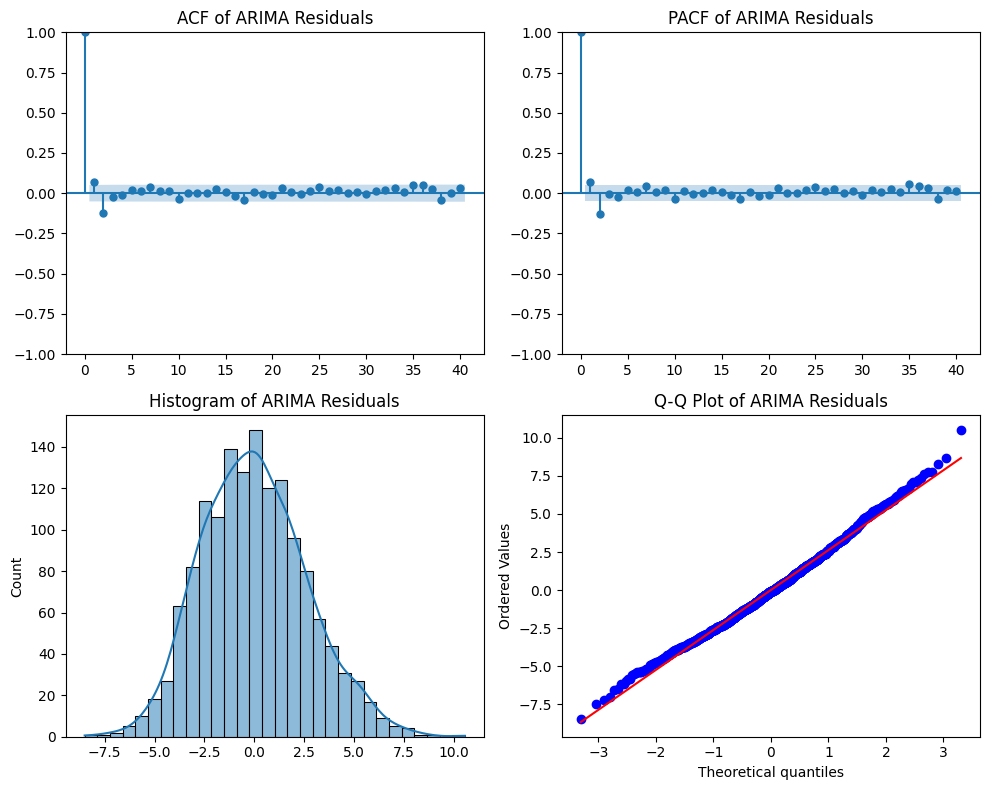

In [258]:
import seaborn as sns
from scipy.stats import probplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming arima_fit is your ARIMA model fit
arima_residuals = arima_fit.resid

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# ACF plot
plot_acf(arima_residuals, lags=40, title='ACF of ARIMA Residuals', ax=axs[0, 0])

# PACF plot
plot_pacf(arima_residuals, lags=40, title='PACF of ARIMA Residuals', ax=axs[0, 1])

# Histogram
sns.histplot(arima_residuals, bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram of ARIMA Residuals')

# Q-Q plot
probplot(arima_residuals, plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot of ARIMA Residuals')

# Adjust layout
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\diag_arima.png')  # Change the file extension for different formats
plt.show()


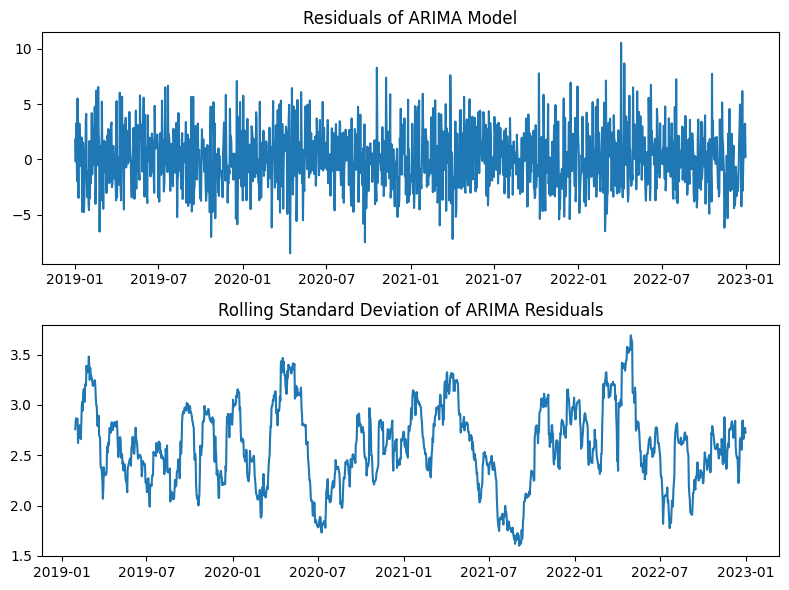

In [259]:
# Create subplots
fig, axs = plt.subplots(2, figsize=(8, 6))

# Residuals plot
axs[0].plot(arima_residuals)
axs[0].set_title('Residuals of ARIMA Model')

# Rolling standard deviation plot
rolling_std_arima = arima_residuals.rolling(window=30).std()
axs[1].plot(rolling_std_arima)
axs[1].set_title('Rolling Standard Deviation of ARIMA Residuals')

# Adjust layout
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\rsidual_rst.png')  # Change the file extension for different formats

plt.show()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


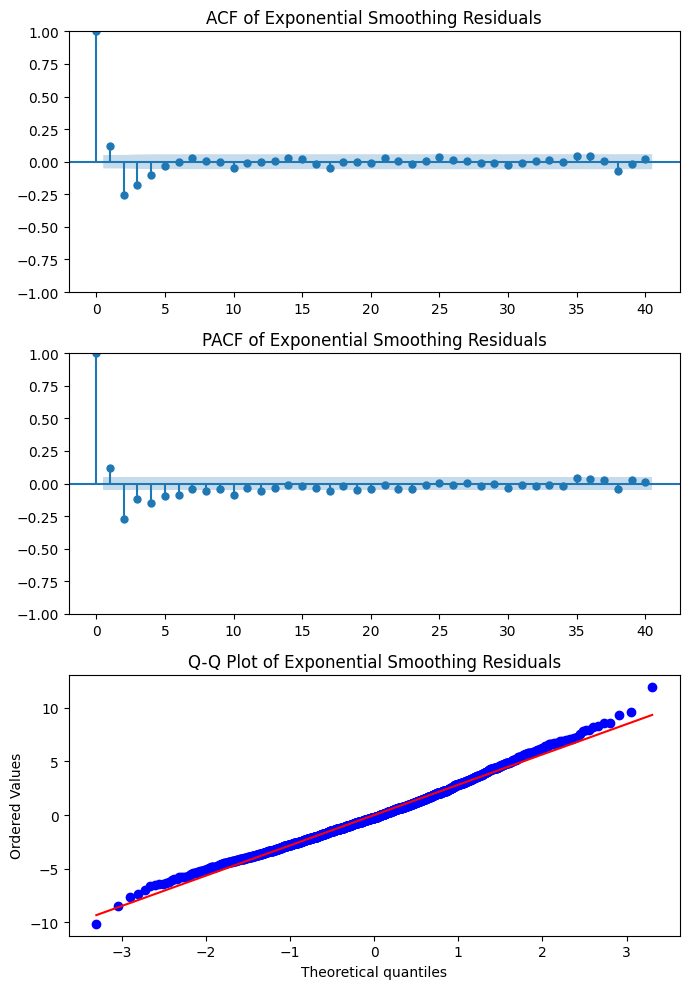

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming train_ts is your training time series data
train_ts_pd = pd.Series(train_ts, index=train_ts.index)

# Fit the Exponential Smoothing model on the training data
exp_smooth_fit = ExponentialSmoothing(train_ts_pd, trend='add', seasonal=None).fit()

# Get the fitted values on the training set
fitted_values_exp_smooth = exp_smooth_fit.fittedvalues

# Calculate residuals
exp_smooth_residuals = train_ts_pd - fitted_values_exp_smooth

# Calculate residuals
exp_smooth_residuals = train_ts_pd - fitted_values_exp_smooth

# Create subplots
fig, axs = plt.subplots(3, figsize=(7, 10))

# ACF plot
plot_acf(exp_smooth_residuals, lags=40, title='ACF of Exponential Smoothing Residuals', ax=axs[0])

# PACF plot
plot_pacf(exp_smooth_residuals, lags=40, title='PACF of Exponential Smoothing Residuals', ax=axs[1])

# Q-Q plot
probplot(exp_smooth_residuals, plot=axs[2])
axs[2].set_title('Q-Q Plot of Exponential Smoothing Residuals')

# Adjust layout
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\acf_pacf_qq_exp.png')  # Change the file extension for different formats
plt.show()

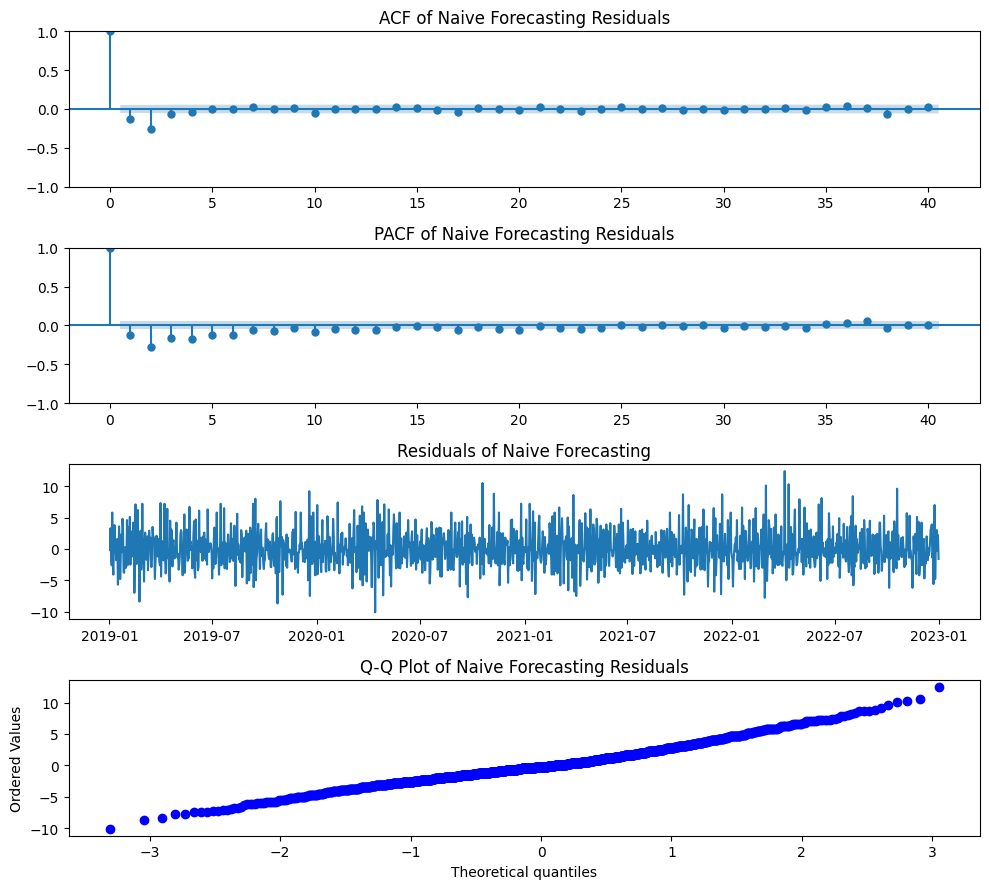

In [261]:
# Assuming train_ts is your training time series data
train_ts_pd = pd.Series(train_ts, index=train_ts.index)

# Perform Naive Forecast for the test set
naive_model = train_ts_pd.iloc[-1:].repeat(forecast_periods)

# Calculate residuals
naive_residuals = train_ts_pd - train_ts_pd.shift(1)

# Create subplots
fig, axs = plt.subplots(4, figsize=(10,9))

# ACF plot
plot_acf(naive_residuals.dropna(), lags=40, title='ACF of Naive Forecasting Residuals', ax=axs[0])

# PACF plot
plot_pacf(naive_residuals.dropna(), lags=40, title='PACF of Naive Forecasting Residuals', ax=axs[1])

# Residuals plot
axs[2].plot(naive_residuals)
axs[2].set_title('Residuals of Naive Forecasting')

# Q-Q plot
probplot(naive_residuals, plot=axs[3])
axs[3].set_title('Q-Q Plot of Naive Forecasting Residuals')

# Adjust layout
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\wather_images\\acf_pacf_naivefc.png')  # Change the file extension for different formats
plt.show()